In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DayLocator, DateFormatter
import numpy as np
import pandas as pd
from itertools import product
%matplotlib inline

In [52]:
data = pd.read_csv("six_der_sc_202403_l3_data.csv")
dates = pd.to_datetime(data["TimeUTC"], format="ISO8601")

time_start = dates.iloc[0]
time_end = dates.iloc[-1]

time_start_s = time_start.strftime('%a %d %b %Y %I:%M%p')
time_end_s = time_end.strftime('%a %d %b %Y %I:%M%p')


Plot SIXS-P proton flux time series data

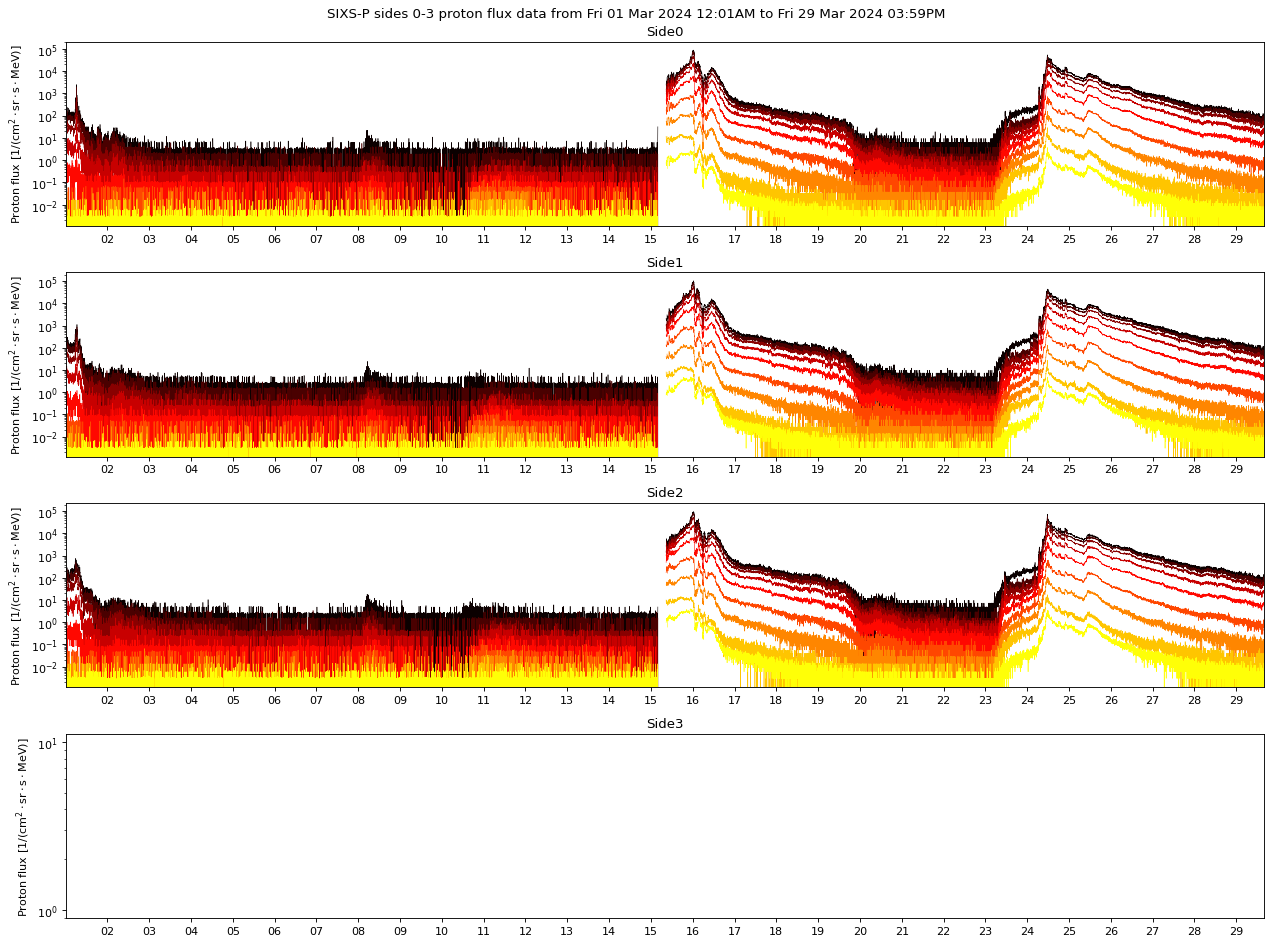

In [64]:
# create a list of side-channel combinations
sides = range(4)    
channel_range_p = range(1, 10)
channels = [f"Side{i}_P{j}" for i, j in product(sides, channel_range_p)]

# reshape it to plotting configuration
channels = np.array(channels).reshape((len(sides), len(channel_range_p))) 

fig, axs = plt.subplots(len(sides), 1, figsize=(16, 12), dpi=80, sharex=True)
fig.suptitle(f"SIXS-P sides 0-3 proton flux data from {time_start_s} to {time_end_s}")

# colormapping
colors = plt.cm.hot(np.linspace(0,0.75,len(channel_range_p)))

# date ticks
day_locator = DayLocator(interval=1)
date_formatter = DateFormatter("%d")
axs[0].xaxis.set_major_locator(day_locator)
axs[0].xaxis.set_major_formatter(date_formatter)

for i in sides:
    for j in range(len(channel_range_p)):    
        axs[i].plot(dates, data[channels[i, j]], color=colors[j], lw=0.5)
    axs[i].set_title(f"Side{i}")
    axs[i].set_ylabel(r"Proton flux $\mathrm{[1/(cm^2 \cdot sr\cdot s \cdot MeV)]}$")
    axs[i].semilogy()
    axs[i].tick_params("x", labelbottom=True)
    
plt.xlim((time_start, time_end))
plt.tight_layout()
plt.show()

Plot electron flux time series data

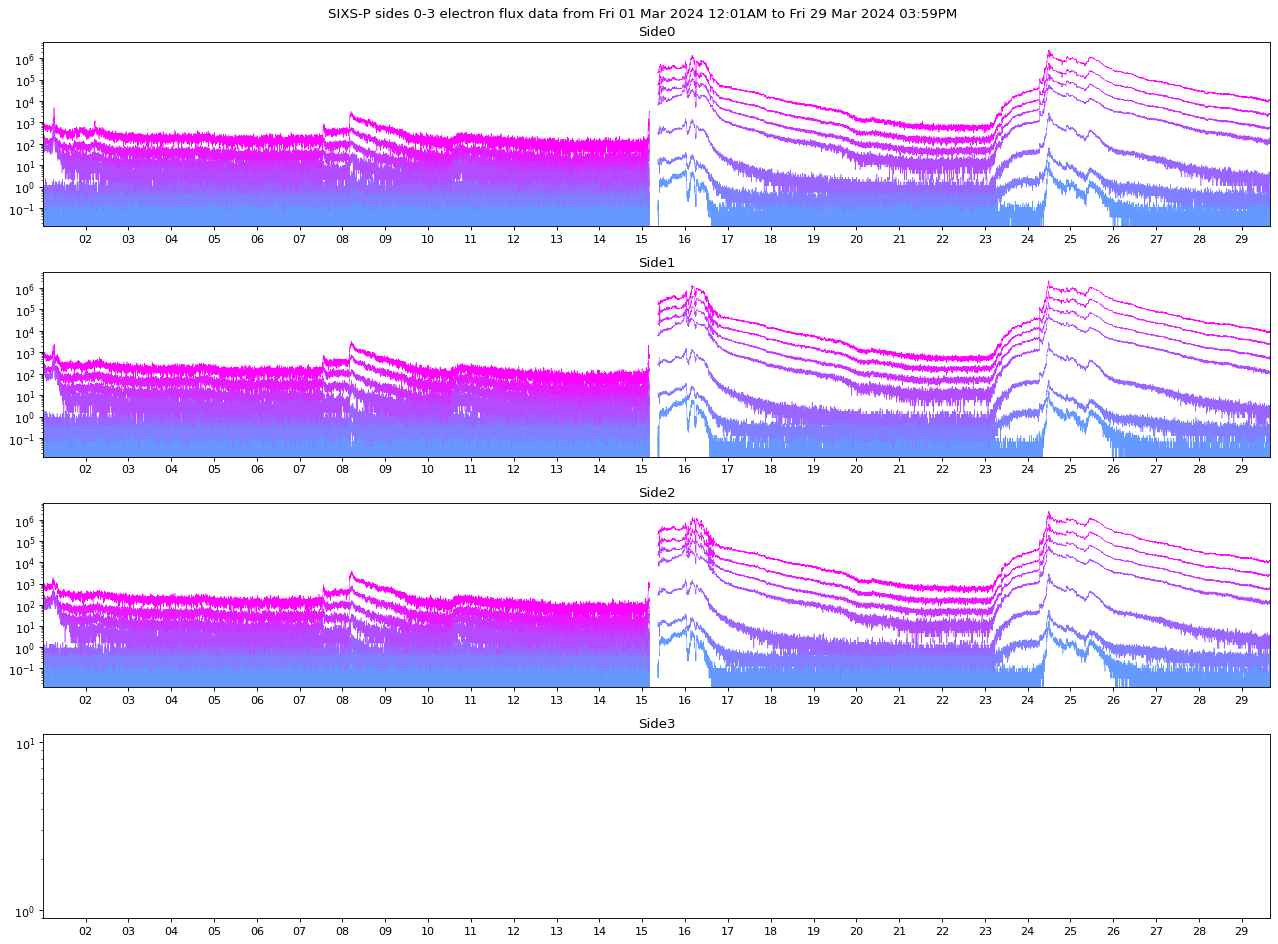

In [65]:
# create a list of side-channel combinations
sides = range(4)    
channel_range_e = range(1, 8)
channels = [f"Side{i}_E{j}" for i, j in product(sides, channel_range_e)]

# reshape it to plotting configuration
channels = np.array(channels).reshape((len(sides), len(channel_range_e))) 

fig, axs = plt.subplots(len(sides), 1, figsize=(16, 12), dpi=80, sharex=True)
fig.suptitle(f"SIXS-P sides 0-3 electron flux data from {time_start_s} to {time_end_s}")

# colormapping
colors = plt.cm.cool_r(np.linspace(0, 0.6, len(channel_range_e)))

# date ticks
day_locator = DayLocator(interval=1)
date_formatter = DateFormatter("%d")
axs[0].xaxis.set_major_locator(day_locator)
axs[0].xaxis.set_major_formatter(date_formatter)

for i in sides:
    for j in range(len(channel_range_e)):    
        axs[i].plot(dates, data[channels[i, j]], color=colors[j], lw=0.5)
    axs[i].set_title(f"Side{i}")
    axs[i].semilogy()
    axs[i].tick_params("x", labelbottom=True)
    
plt.xlim((time_start, time_end))
plt.tight_layout()
plt.show()